In [410]:
%matplotlib inline
import pandas as pd

In [411]:
#df = pd.read.from_csv('canadian_museum_test2.csv', index_col=None)
##titles.head()
df = pd.read_csv('canadian_museum_test.csv')

df = df.rename(columns={
    'Unnamed:36' : 'M_pimage',})
df.head(2)

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
0,1966.0001.001,Cover,PAPER,WESTERN CANADA AIRWAYS LTD.,NaN,Unknown,Unknown,NaN,NaN,1927,...,paper,4.5 cm,2.6 cm,NaN,NaN,NaN,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
1,1966.0002.001,"Stamp, postage",PAPER,WESTERN CANADA AIRWAYS LTD.,NaN,Unknown,Unknown,NaN,NaN,1927,...,paper,3.8 cm,2.7 cm,NaN,NaN,NaN,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


In [91]:
##rd = release_dates
##rd = rd[rd.title.str.contains('Christmas')]
##rd = rd[rd.country == 'USA']
##rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

# bd = df
# bd = bd[bd.BeginDate // 10 * 10]
# bd.sort_index.plot(kind='bar')

In [412]:
df.columns

Index([u'artifactNumber', u'ObjectName', u'GeneralDescription', u'model',
       u'SerialNumber', u'Manufacturer', u'ManuCountry', u'ManuProvince',
       u'ManuCity', u'BeginDate', u'EndDate', u'date_qualifier', u'patent',
       u'NumberOfComponents', u'ArtifactFinish', u'ContextCanada',
       u'ContextFunction', u'ContextTechnical', u'group1', u'category1',
       u'subcategory1', u'group2', u'category2', u'subcategory2', u'group3',
       u'category3', u'subcategory3', u'material', u'Length', u'Width',
       u'Height', u'Thickness', u'Weight', u'Diameter', u'image', u'thumbnail',
       u'Unnamed: 36'],
      dtype='object')

In [441]:
df.Length = df.Length.fillna('')
df.Width = df.Width.fillna('')
df.Height = df.Height.fillna('')
df.Weight = df.Weight.fillna('')
df.Thickness = df.Thickness.fillna('')
df.Diameter = df.Diameter.fillna('')
df.BeginDate = df.BeginDate.fillna(50)
df.EndDate = df.EndDate.fillna(50)

In [65]:
# df.loc[df.Weight.str.contains('cm'),['artifactNumber','material','Length','Width','Height','Thickness','Weight','Diameter']]

,artifactNumber,material,Length,Width,Height,Thickness,Weight,Diameter
1933,1966.0971.001,paper->cardboard;wood->;glass->;metal->steel,49.8 cm,38.8 cm,NaN,NaN,1.9 cm,NaN
1940,1966.0978.001,paper->;glass->;synthetic->plastic;metal->steel,45.3 cm,40.0 cm,NaN,NaN,2.3 cm,NaN
38417,1984.1346.002,skin->leather;fibre,19.5 cm,NaN,NaN,1.2 cm,13.3 cm,NaN
53534,1989.0488.001,synthetic->plastic;metal->aluminum - possible,28.0 cm,25.2 cm,NaN,NaN,1.0 cm,NaN
57845,1991.0773.001,synthetic->plastic;metal->aluminum - possible,28.6 cm,25.5 cm,NaN,NaN,1.0 cm,NaN
57864,1991.0788.001,paper->;glass->;metal->aluminum;metal->steel,71.5 cm,NaN,NaN,2.3 cm,55.7 cm,NaN
66771,1994.0626.001,paper->;wood->;metal->steel,51.1 cm,41.0 cm,NaN,NaN,1.0 cm,NaN
74964,1996.0625.002,paper->cardboard;synthetic,19.4 cm,NaN,NaN,1.2 cm,11.8 cm,NaN
76201,1997.0162.003,wood->;metal->brass;fibre->felt,43.8 cm,NaN,21.3 cm,NaN,23.0 cm,NaN
87612,2002.0430.001,paper->cardboard;glass->;metal->aluminum;metal...,62.0 cm,NaN,NaN,2.3 cm,46.5 cm,NaN


In [282]:
dims = ['Length', 'Width','Height', 'Thickness', 'Weight', 'Diameter']

In [414]:
for i in dims:
    print i
    uniq_lens = df.loc[:,[i]].drop_duplicates()
    uniq_lens[i] = uniq_lens[i].fillna('')
    uniq_lens['ends'] = uniq_lens[i].map(lambda x:x.split(' ')[-1])
    print uniq_lens.ends.unique()

Length
['cm' '' 'M' 'CM' 'm']
Width
['cm' '' 'M' 'CM']
Height
['' 'cm' 'M' 'kg' 'mm']
Thickness
['' 'cm' 'kg' 'CM']
Weight
['' 'kg' 'cm' 'gm']
Diameter
['' 'cm' 'M']


In [415]:
df[df.Height.str.contains('kg',case=False)]
############## Move Height where 'kg' to Weight ######

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
3213,1967.0901.017,"Valve, elevator control",predom. steel & aluminum/ pt.8 glass bottle wi...,NaN,NaN,Minneapolis-Honeywell Regulator Co.,United States of America,NaN,NaN,1959,...,metal->steel;metal->aluminum;glass->;synthetic...,220.2 cm,13.0 cm,7.5 kg,,,,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


In [121]:
df[df.Thickness.str.contains('kg',case=False)]
############# Move Thickness where 'kg' to Weight ######

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
66768,1994.0623.001,Print,paper print; glass; aluminum frame; steel conn...,Sugar's Blues,11/25 AP,NaN,Unknown,NaN,NaN,1994,...,paper->;glass->;metal->aluminum;metal->steel,61.5 cm,49.5 cm,,2.2 kg,,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


In [193]:
df[df.Weight.str.contains('cm',case=False)]
############# Move Weight where 'cm' to Diameter ######

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
1933,1966.0971.001,Photograph,photograph paper; wood frame; glass; paper & c...,NaN,NaN,"JARMAN, FRANK LTD.",Canada,Ontario,Ottawa,1941,...,paper->cardboard;wood->;glass->;metal->steel,49.8 cm,38.8 cm,,,1.9 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
1940,1966.0978.001,Photograph,photograph paper; glass; plastic frame; steel ...,NaN,NaN,Royal Canadian Air Force,Canada,Ontario,Ottawa,1927,...,paper->;glass->;synthetic->plastic;metal->steel,45.3 cm,40.0 cm,,,2.3 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
38417,1984.1346.002,"Case, map",leather; fabric threat stitching; button - uni...,NaN,NaN,Unknown,Unknown,NaN,NaN,1917,...,skin->leather;fibre,19.5 cm,,,1.2 cm,13.3 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...
53534,1989.0488.001,"Calculator, air navigation",plastic; metal swivel at centre - possibly alu...,B-24D,NaN,Consolidated Aircraft Corp.,United States of America,California,San diego,1941,...,synthetic->plastic;metal->aluminum - possible,28.0 cm,25.2 cm,,,1.0 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
57845,1991.0773.001,"Calculator, air navigation",plastic; metal swivel at centre - possibly alu...,28-5MC,NaN,Consolidated Vultee Aircraft Corp.,United States of America,California,San diego,1953,...,synthetic->plastic;metal->aluminum - possible,28.6 cm,25.5 cm,,,1.0 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
57864,1991.0788.001,Print,paper; glass; aluminum frame & wire; steel con...,Augsberg Raid,130/500,NaN,England,NaN,Lincolnshire,1986,...,paper->;glass->;metal->aluminum;metal->steel,71.5 cm,,,2.3 cm,55.7 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
66771,1994.0626.001,Print,paper print mounted on wooden board; laminated...,Critical Approach,NaN,"VINH, CHARLES",Canada,Québec,Montréal,1991,...,paper->;wood->;metal->steel,51.1 cm,41.0 cm,,,1.0 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
74964,1996.0625.002,"Stamp, postage",PAPER STAMPS/ CARDBOARD ENVELOPES & FOLDERS/ P...,HISTORIC LAND VEHICLES,NaN,Unknown,Unknown,NaN,NaN,NaN,...,paper->cardboard;synthetic,19.4 cm,,,1.2 cm,11.8 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
76201,1997.0162.003,"Standard, mass",BOX: WOOD WITH METAL HARDWARE AND FELT PADDING...,NaN,NaN,"OERTLING, L.",England,NaN,London,1912,...,wood->;metal->brass;fibre->felt,43.8 cm,,21.3 cm,,23.0 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN
87612,2002.0430.001,Drawing,paper; glass; aluminum frame & plate; steel ha...,Douglas DC-9,NaN,NaN,NaN,NaN,NaN,2002,...,paper->cardboard;glass->;metal->aluminum;metal...,62.0 cm,,,2.3 cm,46.5 cm,NaN,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


In [442]:
df2 = df.copy()

In [418]:
height_correct_form = lambda x:x['Height'] if 'kg' in x['Height'].lower() else x['Weight']

In [419]:
df2.Weight = df2.apply(height_correct_form,axis=1)

In [420]:
df2.Height = df2.Height.replace(to_replace=r'\w+\.+\w+\s+kg$',value='',regex=True)

In [421]:
df2[df2.artifactNumber=='1967.0901.017']

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
3213,1967.0901.017,"Valve, elevator control",predom. steel & aluminum/ pt.8 glass bottle wi...,NaN,NaN,Minneapolis-Honeywell Regulator Co.,United States of America,NaN,NaN,1959,...,metal->steel;metal->aluminum;glass->;synthetic...,220.2 cm,13.0 cm,,,7.5 kg,,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


### Move Thickness where 'kg' to Weight

In [422]:
df2[df2.Thickness.str.contains('kg',case=False)]

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
66768,1994.0623.001,Print,paper print; glass; aluminum frame; steel conn...,Sugar's Blues,11/25 AP,NaN,Unknown,NaN,NaN,1994,...,paper->;glass->;metal->aluminum;metal->steel,61.5 cm,49.5 cm,,2.2 kg,,,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


In [423]:
Thickness_correct_form = lambda x:x['Thickness'] if 'kg' in x['Thickness'].lower() else x['Weight']

In [424]:
df2.Weight = df2.apply(Thickness_correct_form,axis=1)
df2.Thickness = df2.Thickness.replace(to_replace=r'\w+\.+\w+\s+kg$',value='',regex=True)

In [425]:
df2[df2.artifactNumber=='1994.0623.001']

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36
66768,1994.0623.001,Print,paper print; glass; aluminum frame; steel conn...,Sugar's Blues,11/25 AP,NaN,Unknown,NaN,NaN,1994,...,paper->;glass->;metal->aluminum;metal->steel,61.5 cm,49.5 cm,,,2.2 kg,,http://source.techno-science.ca/artifacts-arte...,http://source.techno-science.ca/artifacts-arte...,NaN


## Move Weight where 'cm' to Diameter ######

In [426]:
df2[df2.Weight.str.contains('cm',case=False)].shape

(14, 37)

In [427]:
Weight_correct_form = lambda x:x['Weight'] if 'cm' in x['Weight'].lower() else x['Diameter']

In [428]:
df2.Diameter = df2.apply(Weight_correct_form,axis=1)
df2.Weight = df2.Weight.replace(to_replace=r'\w+\.+\w+\s+cm$',value='',regex=True)

In [429]:
df2[df2.Weight.str.contains('cm',case=False)].shape

(0, 37)

In [443]:
df2.BeginDate = df2.BeginDate.replace('Lighting Technology',100)
df2.EndDate = df2.EndDate.replace('Lighting devices', 100)

In [431]:
#df2.BeginDate.fillna('boo')
df2[df2.BeginDate=='Lighting Technology']

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36


In [444]:
df2[df2.BeginDate=='Lighting devices']

,artifactNumber,ObjectName,GeneralDescription,model,SerialNumber,Manufacturer,ManuCountry,ManuProvince,ManuCity,BeginDate,...,material,Length,Width,Height,Thickness,Weight,Diameter,image,thumbnail,Unnamed: 36


In [445]:
df2['BeginDate_clean'] = df2.BeginDate.astype(int)
df2['EndDate_clean'] = df2.EndDate.astype(int)

In [296]:
#begindate_correct_form = lambda x:x['BeginDate'] if 'gy' in x['BeginDate'] else x['group1']

In [452]:
#df2.group1 = df2.apply(begindate_correct_form,axis=1)
#df2.BeginDate = df2.BeginDate.replace(to_replace=r'\w+\.+\w+\s+gy$',value='',regex=True)

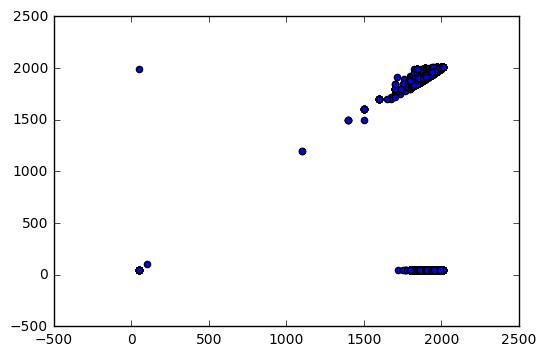

In [453]:
import matplotlib.pyplot as plt
plt.scatter(df2['BeginDate_clean'], df2['EndDate_clean'])

In [448]:
df2.EndDate_clean.unique

<bound method Series.unique of 0           50
1           50
2           50
3           50
4           50
5           50
6           50
7         1960
8           50
9           50
10          50
11          50
12          50
13          50
14          50
15          50
16          50
17          50
18        1910
19          50
20          50
21          50
22          50
23          50
24          50
25        1950
26          50
27        1930
28          50
29          50
          ... 
105094    2013
105095      50
105096      50
105097      50
105098      50
105099      50
105100      50
105101      50
105102      50
105103      50
105104      50
105105      50
105106      50
105107      50
105108      50
105109      50
105110      50
105111      50
105112      50
105113      50
105114      50
105115      50
105116      50
105117      50
105118      50
105119      50
105120      50
105121      50
105122    1910
105123      50
Name: EndDate_clean, dtype: int64>

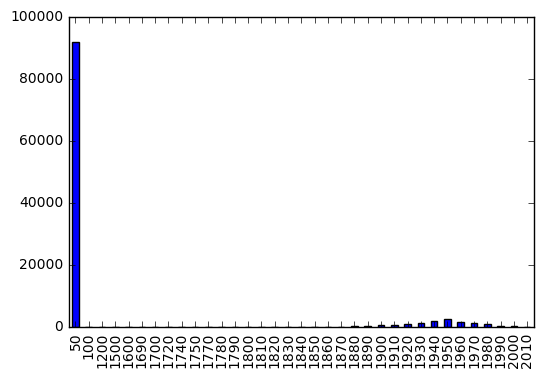

In [461]:
(df2.EndDate_clean // 10 * 10).value_counts().sort_index().plot(kind='bar')

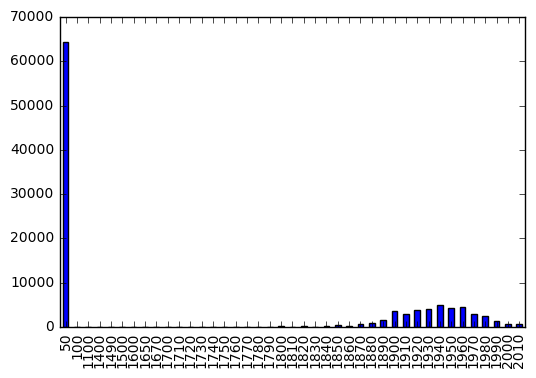

In [459]:
(df2.BeginDate_clean // 10 * 10).value_counts().sort_index().plot(kind='bar')

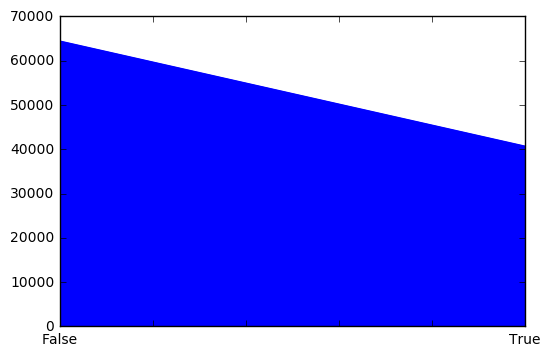

In [464]:
((df2.BeginDate_clean // 10 * 10) > 100).value_counts().sort_index().plot(kind='area')

In [466]:
df2[['artifactNumber','material','Length','Height','Thickness','Weight','Diameter']].head()

,artifactNumber,material,Length,Height,Thickness,Weight,Diameter
0,1966.0001.001,paper,4.5 cm,,,,
1,1966.0002.001,paper,3.8 cm,,,,
2,1966.0003.001,paper,12.8 cm,,,,
3,1966.0004.001,paper,22.4 cm,,,,
4,1966.0005.001,paper,22.7 cm,,,,


## Can you count something interesting?

## Can you make a bar plot or a histogram? Can you compare two related quantities?

## Can you find some trends (high, low, increase, decrease, anomalies)? Can you make a scatterplot?

## Can you make a time-series plot?

## Having made these plots, what are some insights you get from them? Do you see any correlations?

## Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

## Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

## Submit links to a Github repository containing a Jupyter notebook. The notebook should contain: The questions you asked. The trends you investigated. The resulting visualizations and conclusions.In case the data set is too large to commit to Github, please include a link to the data set inside the Jupyter notebook.